In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Camera Calibration
***
We must first start with images that have all camera related distortion accounted for before further processing.

In [27]:
def calibrate_camera(calibration_dir, checker_grid_size=(9,6)):
    # read collection of checkerboard images and extract corners
    objpoints = []
    imgpoints = []
    
    (grid_x, grid_y) = checker_grid_size
    objp = np.zeros((grid_x * grid_y, 3), np.float32)
    objp[:,:2] = np.mgrid[0:grid_x, 0:grid_y].T.reshape(-1, 2)
    
    for cal_file in os.listdir(calibration_dir):
        path = os.path.join(calibration_dir, cal_file)
        img = cv2.imread(path)
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, checker_grid_size, None)
        
        if ret:
            imgpoints.append(corners)
            objpoints.append(objp)
        else:
            # Some images don't find the full 9x6 set of corners because they are cut off.
            # print here for warning though it isn't catastrophic.
            print("Failed to find checkerboard corners!:", cal_file)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    return (mtx, dist) if ret else None

def undistort_image(img, cam_matrix, dist_params):
    return cv2.undistort(img, cam_matrix, dist_params, None, cam_matrix)

(cam_matrix, dist_params) = calibrate_camera('camera_cal')


Failed to find checkerboard corners!: calibration1.jpg
Failed to find checkerboard corners!: calibration4.jpg
Failed to find checkerboard corners!: calibration5.jpg


### Example: (note the lines have straightened out)
***

In [30]:
def before_after_plot(img_before, img_after, title_before, title_after):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img_before)
    ax1.set_title(title_before, fontsize=50)
    ax2.imshow(img_after)
    ax2.set_title(title_after, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)    

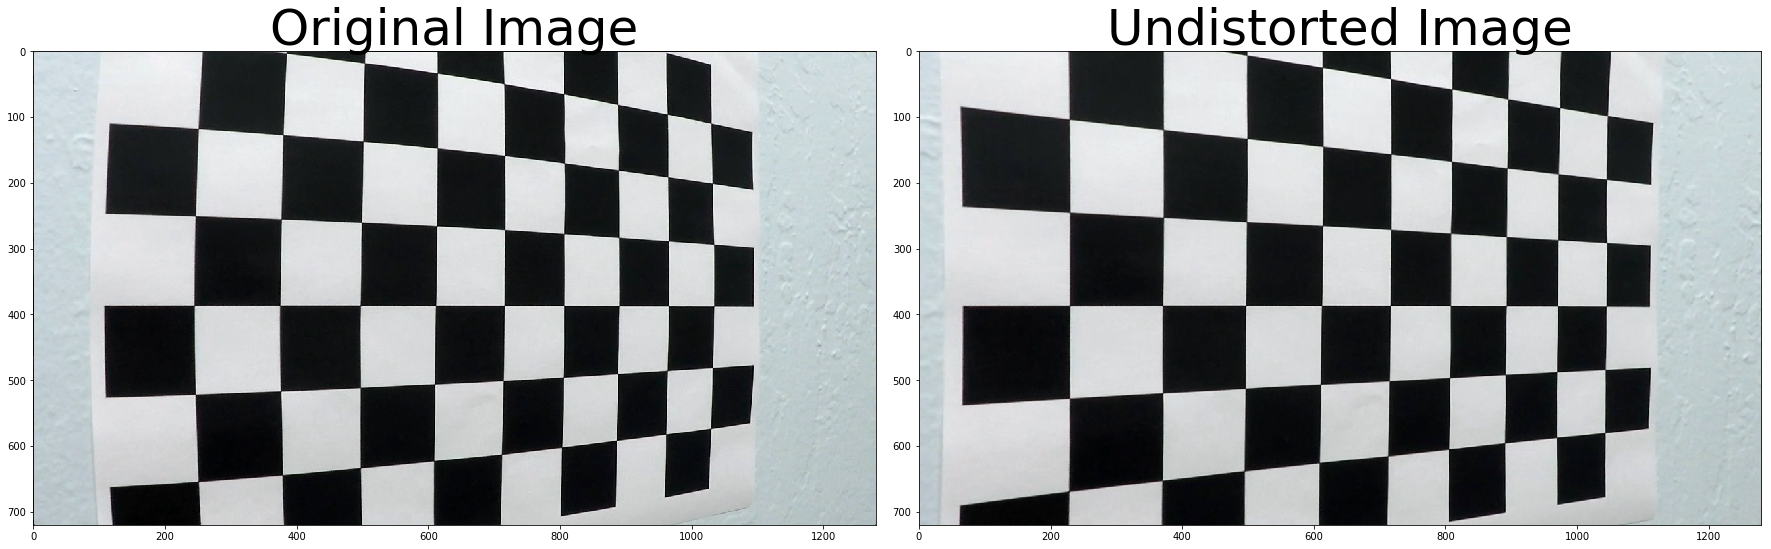

In [31]:
def ex1():
    img = cv2.imread('camera_cal/calibration5.jpg')
    before_after_plot(img, undistort_image(img, cam_matrix, dist_params), 'Original Image', 'Undistorted Image')
ex1()